# Keras Project - Fashion Dataset

### Fashion-MNIST database of fashion articles
Dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images. This dataset can be used as a drop-in replacement for MNIST.

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


So, let's load the MNIST dataset from the Keras library. The dataset is readily divided into a training set and a test set.

In [5]:
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

Let's confirm the number of images in each set. According to the dataset's documentation, we should have 60000 images in X_train and 10000 images in the X_test.

In [6]:
X_train.shape

(60000, 28, 28)

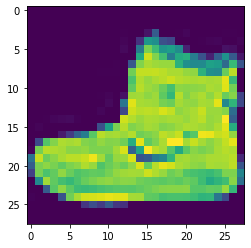

In [7]:
plt.imshow(X_train[0])

In [8]:
X_test.shape

(10000, 28, 28)

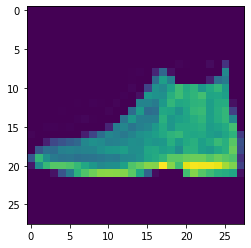

In [9]:
plt.imshow(X_test[0])

With conventional neural networks, we cannot feed in the image as input as is. So we need to flatten the images into one-dimensional vectors, each of size 1 x (28 x 28) = 1 x 784.

In [11]:
# flatten images into one-dimensional vector

num_pixels = X_train.shape[1] * X_train.shape[2] # find size of one-dimensional vector
num_pixels

784

In [12]:
# flatten training images
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') 

# flatten test images
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') 

Since pixel values can range from 0 to 255, let's normalize the vectors to be between 0 and 1.

In [13]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

Finally, before we start building our model, remember that for classification we need to divide our target variable into categories. We use the to_categorical function from the Keras Utilities package.

In [14]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

num_classes = y_test.shape[1]
print(num_classes)

10


## Build a Neural Network

In [15]:
# define classification model
def classification_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## Train and Test the Network

In [16]:
# build the model
model = classification_model()

# fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2)

# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 29s - loss: 0.4718 - acc: 0.8295 - val_loss: 0.4328 - val_acc: 0.8396
Epoch 2/10
 - 29s - loss: 0.3570 - acc: 0.8685 - val_loss: 0.3699 - val_acc: 0.8642
Epoch 3/10
 - 28s - loss: 0.3224 - acc: 0.8808 - val_loss: 0.3516 - val_acc: 0.8725
Epoch 4/10
 - 28s - loss: 0.2989 - acc: 0.8880 - val_loss: 0.3409 - val_acc: 0.8774
Epoch 5/10
 - 27s - loss: 0.2780 - acc: 0.8959 - val_loss: 0.3390 - val_acc: 0.8809
Epoch 6/10
 - 29s - loss: 0.2657 - acc: 0.9012 - val_loss: 0.3252 - val_acc: 0.8819
Epoch 7/10
 - 29s - loss: 0.2504 - acc: 0.9055 - val_loss: 0.3372 - val_acc: 0.8807
Epoch 8/10
 - 30s - loss: 0.2390 - acc: 0.9095 - val_loss: 0.3391 - val_acc: 0.8821
Epoch 9/10
 - 29s - loss: 0.2319 - acc: 0.9118 - val_loss: 0.3327 - val_acc: 0.8894
Epoch 10/10
 - 31s - loss: 0.2226 - acc: 0.9151 - val_loss: 0.3494 - val_acc: 0.8855


Let's print the accuracy and the corresponding error.

In [20]:
print('Accuracy: {} \n Error: {}'.format(scores[1], 1 - scores[1]))

Accuracy: 0.8855 
 Error: 0.11450000000000005


Saving the model

In [21]:
model.save('fashion_mnist_model.h5')